### 영화진흥원 하루 전날에 대한 박스오피스 데이터 수집

#### API URL 구성하기

In [13]:
# 필요한 패키지 가져오기

import requests
import json
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# API 키 준비

api_key = "dffa171d2f17e258126c57f05bd9fc81"

In [15]:
# 접속 정보 구성

# 브라우저 버전 정보
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"

# HTTP 헤더 정보 구성
header_info = {'User-agent': user_agent, 'referer': None}

In [16]:
# 변수가 지환될 주소 템플릿

url_tpl = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key={key}&targetDt={date}"

In [17]:
# 조회날짜 문자열 만들기

# 오늘 날짜
today = dt.datetime.now()
# 하루 전을 의미하는 timedelta객체
delta = dt.timedelta(days = -1)
# 오늘 날짜와 timedelta 연산
yesterday = today + delta
# yyyymmdd 형식의 문자열로 변환
yesterday_str = yesterday.strftime("%Y%m%d")
yesterday_str

'20210825'

In [18]:
# 최정 접속 주소 확인
api_url = url_tpl.format(key = api_key, date=yesterday_str)
api_url

'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=dffa171d2f17e258126c57f05bd9fc81&targetDt=20210825'

#### API를 통한 JSON데이터 가져오기

In [19]:
# OpenAPI를 통한 JSON 가져오기

# 데이터 가져오기
# 데이터 가져오기
r = requests.get(api_url, headers=header_info)

# 결과 검사 
# 접속 성공/실패 여부 확인
if r.status_code != 200:
    # 에러코드와 에러메시지 출력
    # 에러코드와 에러메시지를 문자열로 구성
    err_msg = "%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
    raise Exception(err_msg)
    
# 인코딩 형식 지정
r.encoding = "utf8"

r.text

'{"boxOfficeResult":{"boxofficeType":"일별 박스오피스","showRange":"20210825~20210825","dailyBoxOfficeList":[]}}'

In [20]:
# JSON을 딕셔너리로 변환
daily_boxoffice_dict = json.loads(r.text)
daily_boxoffice_dict

{'boxOfficeResult': {'boxofficeType': '일별 박스오피스',
  'showRange': '20210825~20210825',
  'dailyBoxOfficeList': []}}

In [21]:
# 필요한 내용 확인
# 수집하고자 하는 데이터는 박스오피스 순위이므로 해당 데이터를 의미하는 리스트 depth까지 접근하여 별도의 변수에 복사한다.

rank_list = daily_boxoffice_dict["boxOfficeResult"]["dailyBoxOfficeList"]
rank_list

[]

In [10]:
# 수집 결과를 데이터 프레임으로 변환

daily_boxoffice_df = pd.DataFrame(rank_list)
daily_boxoffice_df

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20218391,보스 베이비 2,2021-07-21,361415490,34.4,19559270,5.7,3968224180,41985,2880,7.4,437360,1141,3939
1,2,2,0,OLD,20191951,블랙 위도우,2021-07-07,314068200,29.9,-30032490,-8.7,26944977980,32143,-2835,-8.1,2649166,1192,3932
2,3,3,0,OLD,20218364,랑종,2021-07-14,130801860,12.5,-8714010,-6.2,8265245340,12841,-860,-6.3,796078,725,2022
3,4,4,0,OLD,20218348,이스케이프 룸 2: 노 웨이 아웃,2021-07-14,69669640,6.6,6065180,9.5,2011518090,7045,586,9.1,202158,528,841
4,5,5,0,OLD,20216362,크루엘라,2021-05-26,47577330,4.5,5425460,12.9,19109541020,4934,603,13.9,1968172,344,504
5,6,6,0,OLD,20218567,아이스 로드,2021-07-21,23635690,2.3,1891010,8.7,251148410,2568,199,8.4,26210,326,488
6,7,7,1,OLD,20200237,호스트: 접속금지,2021-07-21,10621400,1.0,871200,8.9,122976600,1243,222,21.7,13218,135,219
7,8,8,0,NEW,20192986,프리 가이,2021-08-11,15728000,1.5,15728000,100,15728000,1164,1164,100,1164,2,3
8,9,9,-2,OLD,20218420,은혼 더 파이널,2021-07-22,10421040,1.0,-892580,-7.9,193980730,1107,-70,-5.9,20065,141,266
9,10,10,0,OLD,20192696,발신제한,2021-06-23,8527440,0.8,545650,6.8,9075675990,940,65,7.4,950830,147,191


#### 데이터 전처리

In [11]:
# 사용할 컬럼만 추출
tmp_df = daily_boxoffice_df[['movieNm', 'audiCnt']]
tmp_df

,movieNm,audiCnt
0,보스 베이비 2,41985
1,블랙 위도우,32143
2,랑종,12841
3,이스케이프 룸 2: 노 웨이 아웃,7045
4,크루엘라,4934
5,아이스 로드,2568
6,호스트: 접속금지,1243
7,프리 가이,1164
8,은혼 더 파이널,1107
9,발신제한,940


In [12]:
# 컬럼이름 변경

tmp_df2 = tmp_df.rename(columns={'movieNm': '영화제목', 'audiCnt': '관람객'})
tmp_df2

,영화제목,관람객
0,보스 베이비 2,41985
1,블랙 위도우,32143
2,랑종,12841
3,이스케이프 룸 2: 노 웨이 아웃,7045
4,크루엘라,4934
5,아이스 로드,2568
6,호스트: 접속금지,1243
7,프리 가이,1164
8,은혼 더 파이널,1107
9,발신제한,940


In [13]:
# 영화 제목을 인덱스로 지정

daily_rank_df = tmp_df2.set_index('영화제목')
daily_rank_df

,관람객
영화제목,
보스 베이비 2,41985
블랙 위도우,32143
랑종,12841
이스케이프 룸 2: 노 웨이 아웃,7045
크루엘라,4934
아이스 로드,2568
호스트: 접속금지,1243
프리 가이,1164
은혼 더 파이널,1107


In [16]:
# 관람객 컬럼의 타입을 숫자형식으로 형변환

daily_rank_df['관람객'] = daily_rank_df['관람객'].apply(int)
daily_rank_df.dtypes

관람객    int64
dtype: object

In [17]:
# 오름차순 정렬

daily_rank_df.sort_values('관람객', inplace=True)
daily_rank_df

,관람객
영화제목,
발신제한,940
은혼 더 파이널,1107
프리 가이,1164
호스트: 접속금지,1243
아이스 로드,2568
크루엘라,4934
이스케이프 룸 2: 노 웨이 아웃,7045
랑종,12841
블랙 위도우,32143


#### 데이터 시각화

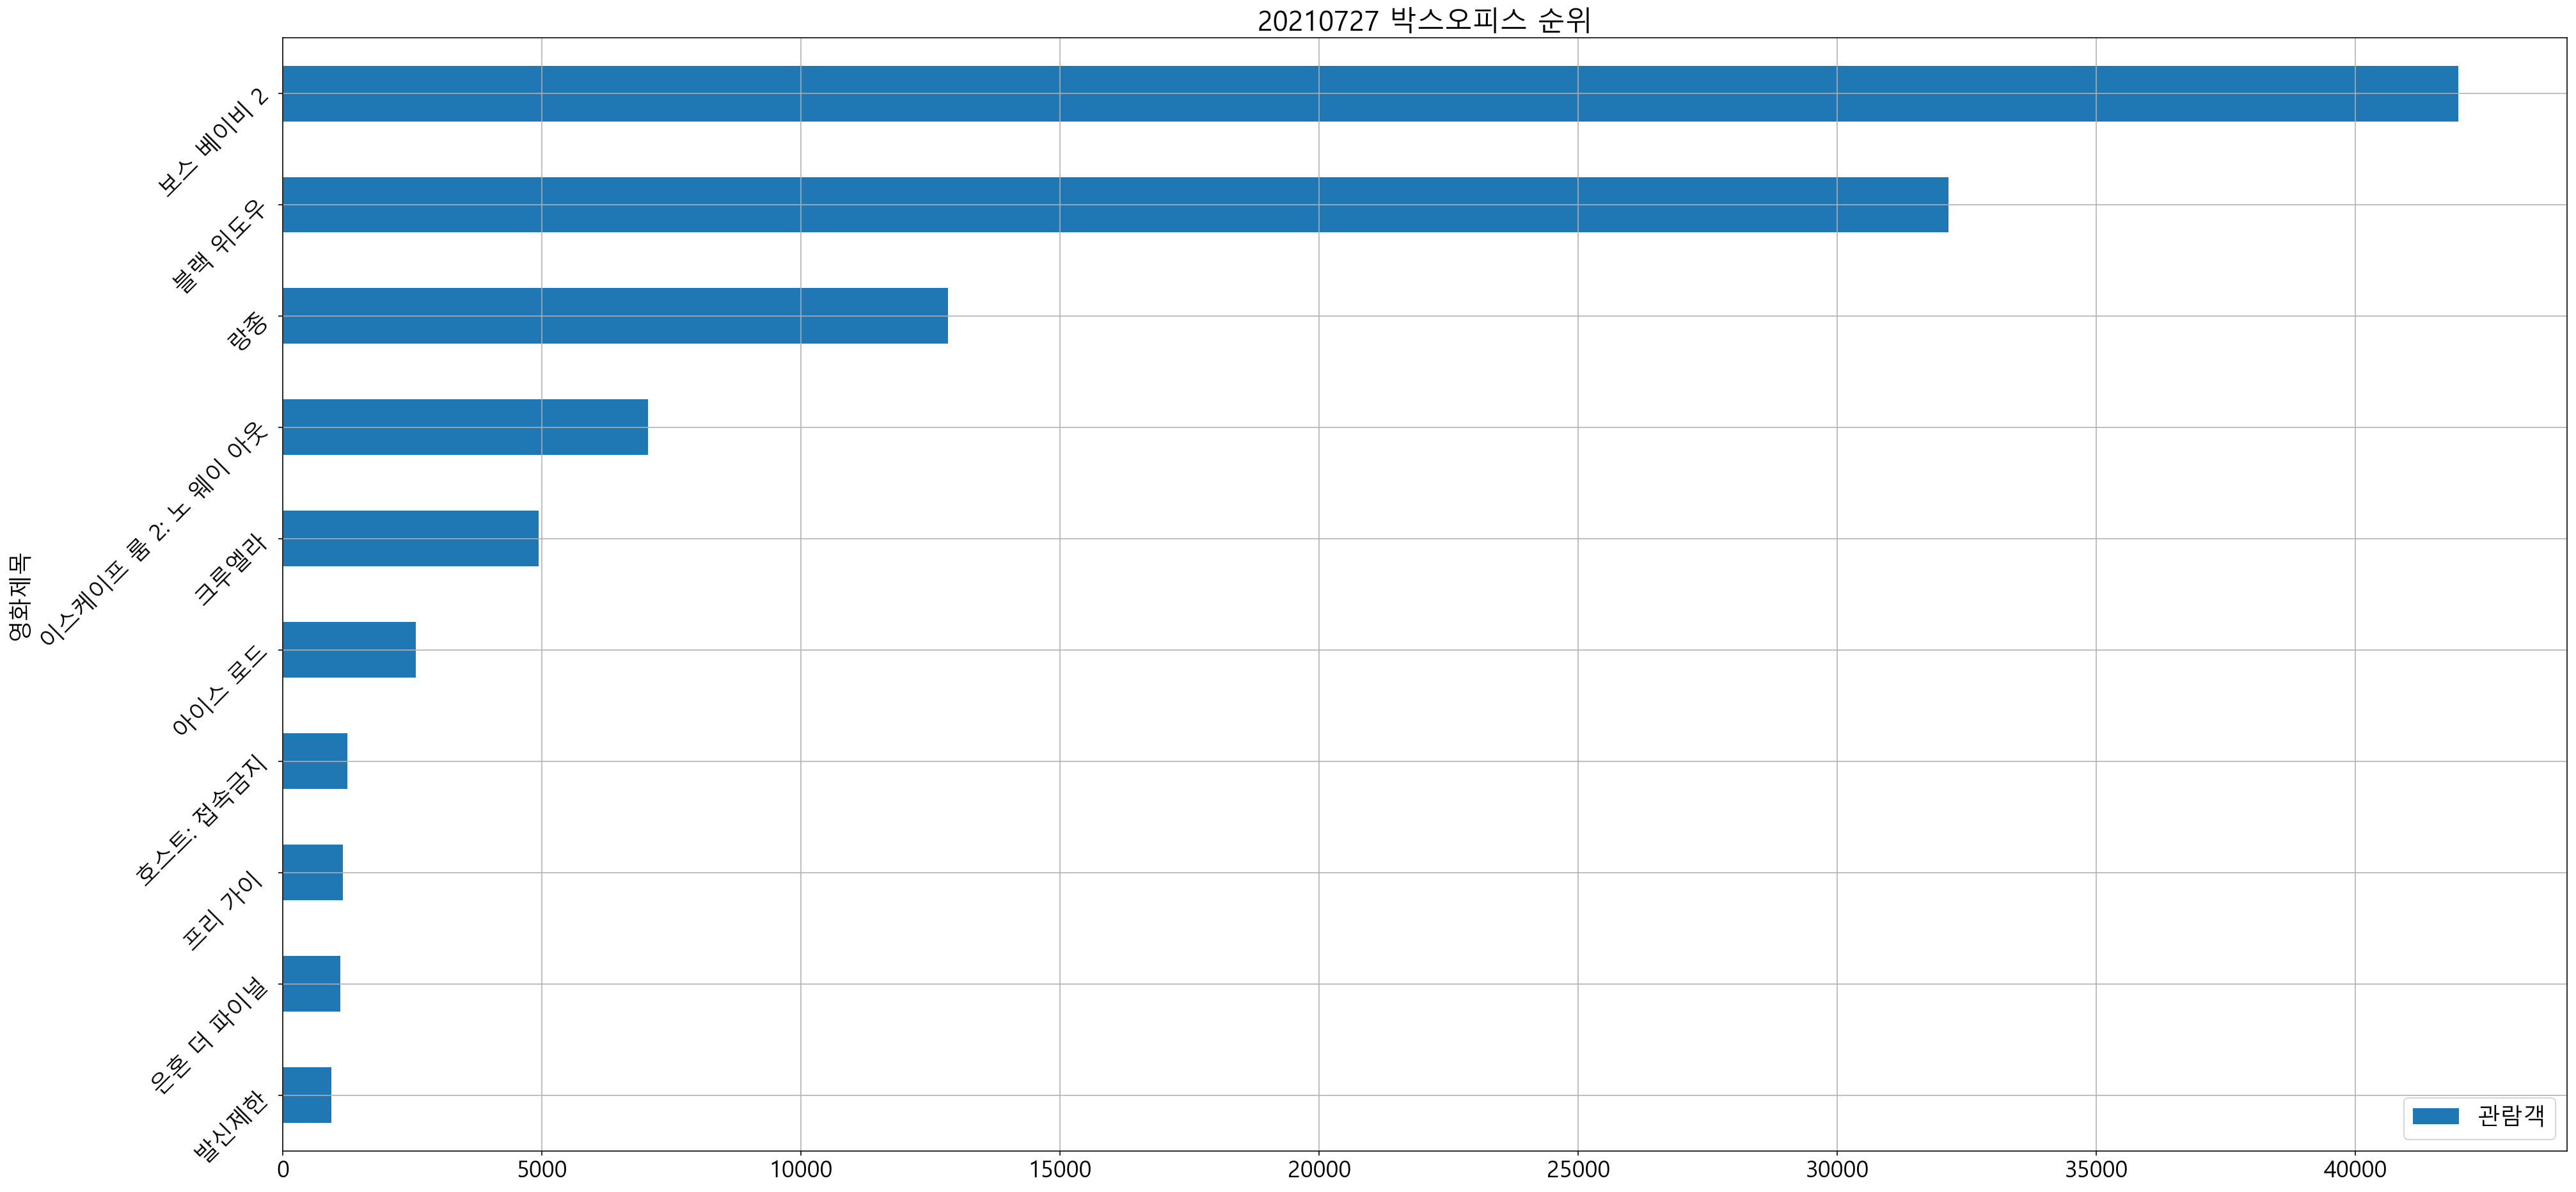

In [20]:
# 그래프 만들기
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = (32, 16)

# 전체 컬럼에 대한 시각화
daily_rank_df.plot.barh(rot=45)
plt.grid()
plt.title("%s 박스오피스 순위" % yesterday_str)
plt.legend()
plt.show()
plt.close()

### 영화별 일주일 간의 곤람객 수 변동 현황

####  반복문을 수행하여 일주일치 데이터 수집하기

In [25]:
# 일주일치 데이터 수집하기

# 반복을 수행하면서 생성되는 조회결과를 누적시킬 빈 리스트 준비
영화관람객수_list = []

# 반복을 수행하면서 생성되는 조회결과를 누적시킬 빈 리스트 준비
영화관람객수_list = []

# 일주일간의 기간을 위한 반복문 구성
for i in range(-7, 0):
    
    #### 조회날짜 문자열 만들기
    today = dt.datetime.now()                       # 오늘날짜
    delta = dt.timedelta(days = i)                  # i일 전을 의미하는 timedelta객체
    yesterday = today + delta                       # 오늘 날짜와 timedelta 연산
    target_dt = yesterday.strftime("%Y%m%d")        # yyyymmdd 형식 문자열로 변환
    yesterday_str = yesterday.strftime("%y/%m/%d")
    #print(yesterday_str)
    
    #### 최종 접속 주소 확인
    api_url = url_tpl.format(key=api_key, date=target_dt)
    #print(api_url)
    
    #### API를 통한 JSON 데이터 가져오기
    r = requests.get(api_url, headers=header_info)
    
    # 결과 검사
    if r.status_code != 200:
        # 에러코드와 에러메시지를 문자열로 구성
        err_msg = "%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
        # 강제로 에러를 발생시킨다.
        raise Exception(err_msg)

    r.encoding = "utf-8"
    #print(r.text)
    #print("-" * 50)
    
    #### 딕셔너리로 변환하여 리스트 부분만 추출
    daily_boxoffice_dict = json.loads(r.text)
    daily_boxoffice_list = daily_boxoffice_dict['boxOfficeResult']['dailyBoxOfficeList']
    #print(daily_boxoffice_list)
    #print("-" * 30)
    
    #### 리스트의 각 원소(딕셔너리)에 조회날짜 key 추가
    for boxoffice in daily_boxoffice_list:
        boxoffice['date'] = yesterday_str
        
    #print(daily_boxoffice_list)
    #print("-" * 30)
    
    #### 빈 리스트에 누적
    영화관람객수_list += daily_boxoffice_list

### 최종 결과 출력하기
# 영화관람객수_list

In [26]:
df = pd.DataFrame(영화관람객수_list)
df

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,date
0,1,1,0,NEW,20218391,보스 베이비 2,2021-07-21,505302360,34.7,505302360,100,505302360,57914,57914,100,57914,1095,4013,21/07/21
1,2,2,-1,OLD,20191951,블랙 위도우,2021-07-07,443476660,30.4,-43725050,-9,23259600070,45736,-4077,-8.2,2289568,1248,4243,21/07/21
2,3,3,-1,OLD,20218364,랑종,2021-07-14,250426080,17.2,-50998460,-16.9,6711615960,24743,-5135,-17.2,649231,874,2674,21/07/21
3,4,4,-1,OLD,20218348,이스케이프 룸 2: 노 웨이 아웃,2021-07-14,70088110,4.8,-45397350,-39.3,1412144790,7183,-4788,-40,143377,539,826,21/07/21
4,5,5,-1,OLD,20216362,크루엘라,2021-05-26,42626000,2.9,-19924180,-31.9,18742209200,4651,-1787,-27.8,1931727,310,426,21/07/21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,6,6,0,OLD,20218567,아이스 로드,2021-07-21,23635690,2.3,1891010,8.7,251148410,2568,199,8.4,26210,326,488,21/07/27
66,7,7,1,OLD,20200237,호스트: 접속금지,2021-07-21,10621400,1.0,871200,8.9,122976600,1243,222,21.7,13218,135,219,21/07/27
67,8,8,0,NEW,20192986,프리 가이,2021-08-11,15728000,1.5,15728000,100,15728000,1164,1164,100,1164,2,3,21/07/27
68,9,9,-2,OLD,20218420,은혼 더 파이널,2021-07-22,10421040,1.0,-892580,-7.9,193980730,1107,-70,-5.9,20065,141,266,21/07/27


#### 데이터 전처리

In [27]:
# 필요한 컬럼만 추출하기
df2 = df[['movieNm', 'date', 'audiCnt']]
df2

,movieNm,date,audiCnt
0,보스 베이비 2,21/07/21,57914
1,블랙 위도우,21/07/21,45736
2,랑종,21/07/21,24743
3,이스케이프 룸 2: 노 웨이 아웃,21/07/21,7183
4,크루엘라,21/07/21,4651
...,...,...,...
65,아이스 로드,21/07/27,2568
66,호스트: 접속금지,21/07/27,1243
67,프리 가이,21/07/27,1164
68,은혼 더 파이널,21/07/27,1107


In [29]:
# 관람객수 변수에 대한 데이터 타입 변경
df2['audiCnt'] = df2['audiCnt'].apply(pd.to_numeric)
df2.dtypes

movieNm    object
date       object
audiCnt     int64
dtype: object

In [43]:
# 데이터 재배치

pivot_dt = df2.pivot(index='date', columns='movieNm', values='audiCnt')
pivot_dt

movieNm,랑종,마세티 킬즈,모가디슈,발신제한,보스 베이비 2,블랙 위도우,아이스 로드,액션히어로,은혼 더 파이널,이도공간,이스케이프 룸 2: 노 웨이 아웃,정글 크루즈,크루엘라,프리 가이,호스트: 접속금지
date,,,,,,,,,,,,,,,
21/07/21,24743.0,NaN,NaN,1787.0,57914.0,45736.0,3496.0,1051.0,NaN,997.0,7183.0,NaN,4651.0,NaN,2413.0
21/07/22,21043.0,NaN,2948.0,1070.0,41498.0,41101.0,2964.0,NaN,7996.0,NaN,6764.0,NaN,4356.0,NaN,1871.0
21/07/23,22315.0,1250.0,NaN,1288.0,44859.0,49186.0,3027.0,NaN,2608.0,NaN,8078.0,NaN,4698.0,NaN,1704.0
21/07/24,42436.0,NaN,2359.0,1876.0,109305.0,106345.0,5931.0,NaN,2862.0,NaN,15425.0,NaN,9012.0,NaN,2586.0
21/07/25,34511.0,NaN,4268.0,1871.0,102694.0,95845.0,5733.0,NaN,2342.0,NaN,15010.0,NaN,9114.0,NaN,2380.0
21/07/26,13701.0,NaN,NaN,875.0,39105.0,34978.0,2369.0,NaN,1177.0,NaN,6459.0,966.0,4331.0,NaN,1021.0
21/07/27,12841.0,NaN,NaN,940.0,41985.0,32143.0,2568.0,NaN,1107.0,NaN,7045.0,NaN,4934.0,1164.0,1243.0


#### 데이터 정제

In [44]:
# 결측치 대체

final_df  = pivot_dt.fillna(0)
final_df

movieNm,랑종,마세티 킬즈,모가디슈,발신제한,보스 베이비 2,블랙 위도우,아이스 로드,액션히어로,은혼 더 파이널,이도공간,이스케이프 룸 2: 노 웨이 아웃,정글 크루즈,크루엘라,프리 가이,호스트: 접속금지
date,,,,,,,,,,,,,,,
21/07/21,24743.0,0.0,0.0,1787.0,57914.0,45736.0,3496.0,1051.0,0.0,997.0,7183.0,0.0,4651.0,0.0,2413.0
21/07/22,21043.0,0.0,2948.0,1070.0,41498.0,41101.0,2964.0,0.0,7996.0,0.0,6764.0,0.0,4356.0,0.0,1871.0
21/07/23,22315.0,1250.0,0.0,1288.0,44859.0,49186.0,3027.0,0.0,2608.0,0.0,8078.0,0.0,4698.0,0.0,1704.0
21/07/24,42436.0,0.0,2359.0,1876.0,109305.0,106345.0,5931.0,0.0,2862.0,0.0,15425.0,0.0,9012.0,0.0,2586.0
21/07/25,34511.0,0.0,4268.0,1871.0,102694.0,95845.0,5733.0,0.0,2342.0,0.0,15010.0,0.0,9114.0,0.0,2380.0
21/07/26,13701.0,0.0,0.0,875.0,39105.0,34978.0,2369.0,0.0,1177.0,0.0,6459.0,966.0,4331.0,0.0,1021.0
21/07/27,12841.0,0.0,0.0,940.0,41985.0,32143.0,2568.0,0.0,1107.0,0.0,7045.0,0.0,4934.0,1164.0,1243.0


#### 데이터 시각화

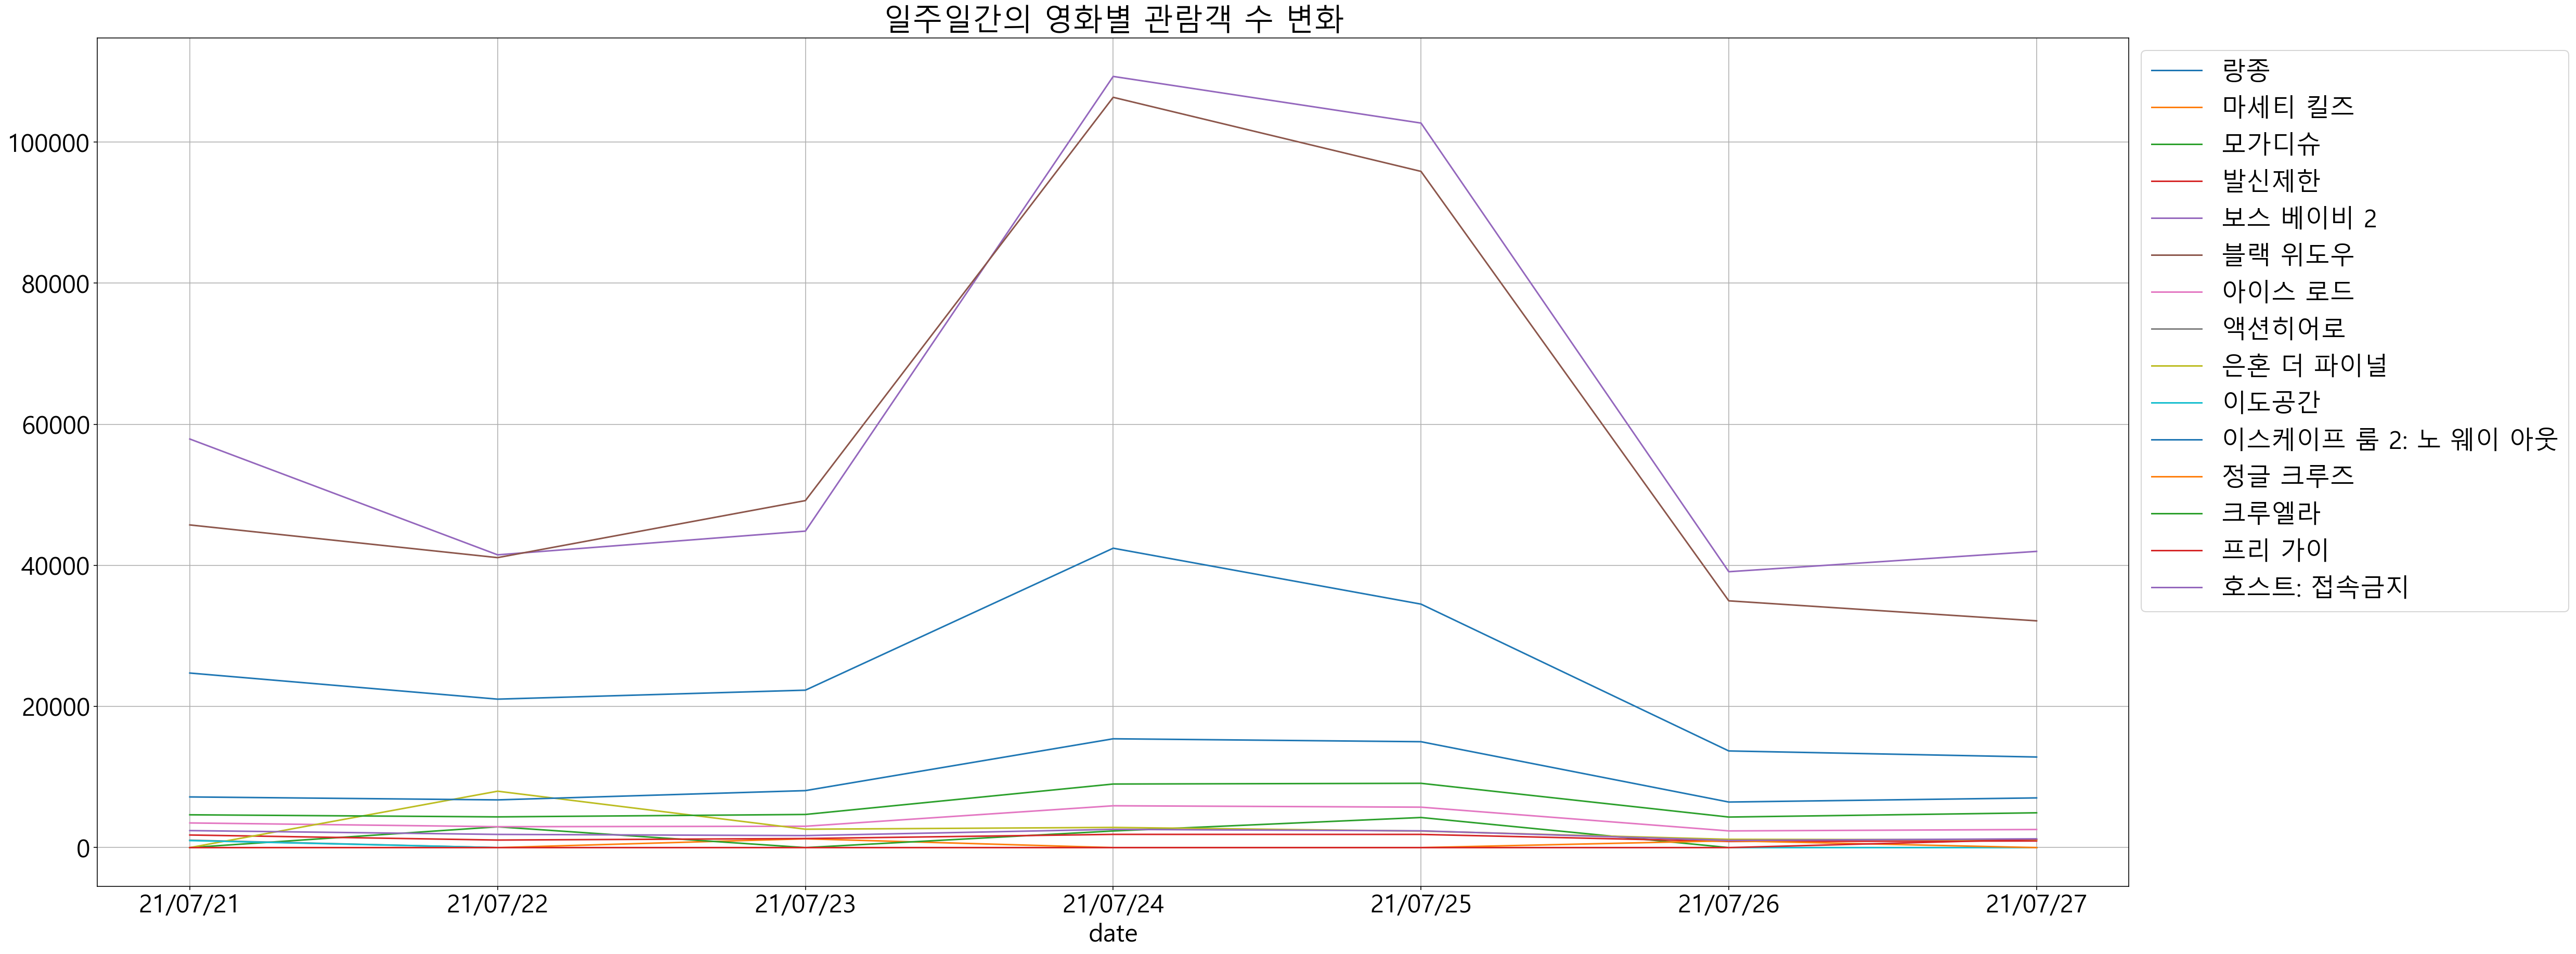

In [45]:
# 그래프 그리기
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 24
plt.rcParams["figure.figsize"] = (35, 15)

# 전체 컬럼에 대한 시각화
final_df.plot(rot=0)
plt.grid()
plt.title("일주일간의 영화별 관람객 수 변화")
plt.legend(bbox_to_anchor=(1,1))
plt.show()
plt.close()